## <center> Multiple Linear Regression

#### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import LinearSVR 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
import klib as k

#### Loading the dataset

In [2]:
data=pd.read_csv('./Admission_Predict_Ver1.1.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
data.shape

(500, 9)

In [5]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
data.isnull().mean()*100

Serial No.           0.0
GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

In [8]:
data.duplicated().sum()

0

In [9]:
k.clean.clean_column_names(data=data)

,serial_no,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [10]:
data.drop(columns='serial_no',inplace=True)
data

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


### Explaratory data analysis
#### Univariate analysis
##### Histogram

In [11]:
data.columns

Index(['gre_score', 'toefl_score', 'university_rating', 'sop', 'lor', 'cgpa',
       'research', 'chance_of_admit'],
      dtype='object')

In [12]:
column1 = ['gre_score', 'toefl_score', 'university_rating', 'sop', 'lor', 'cgpa', 'chance_of_admit']

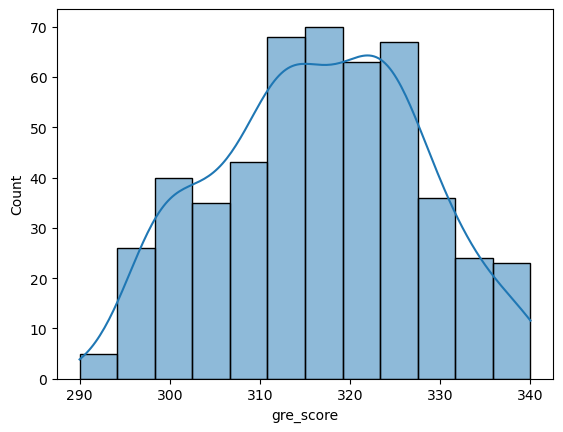

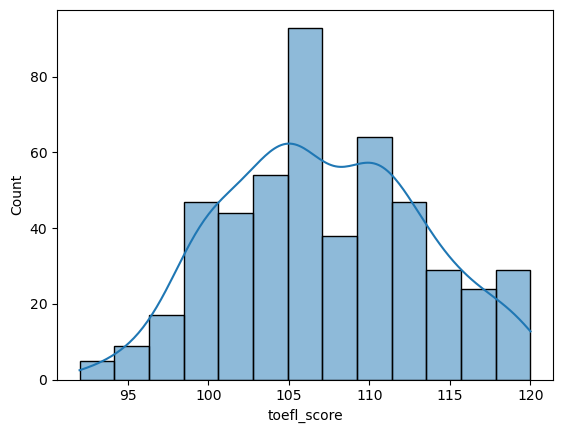

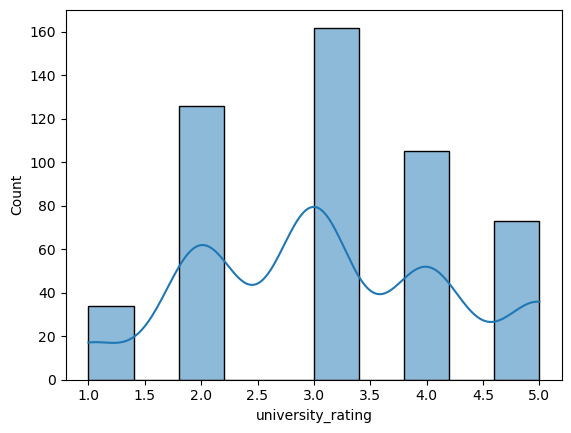

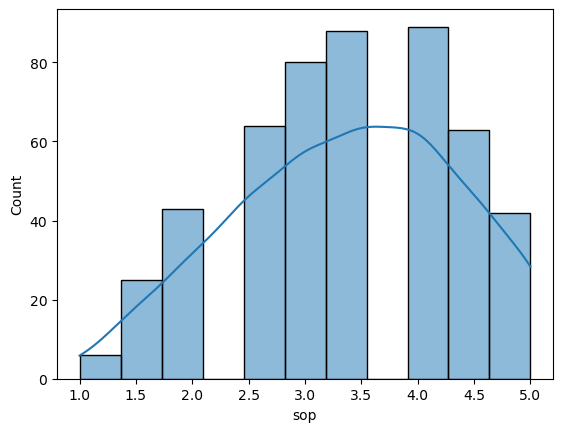

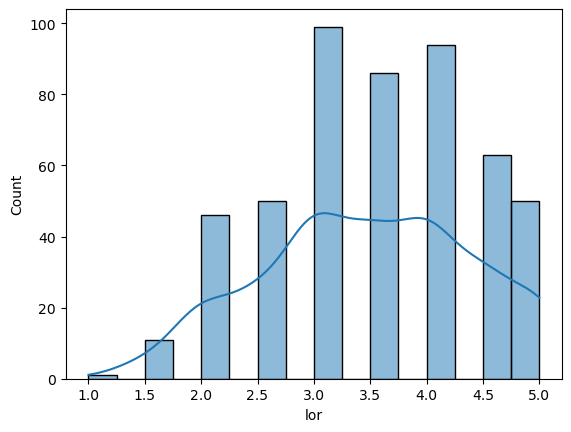

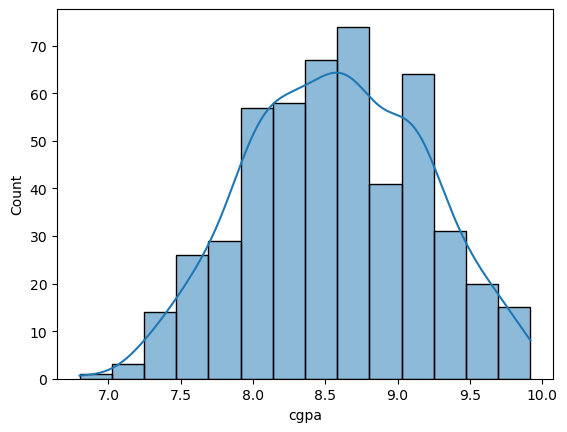

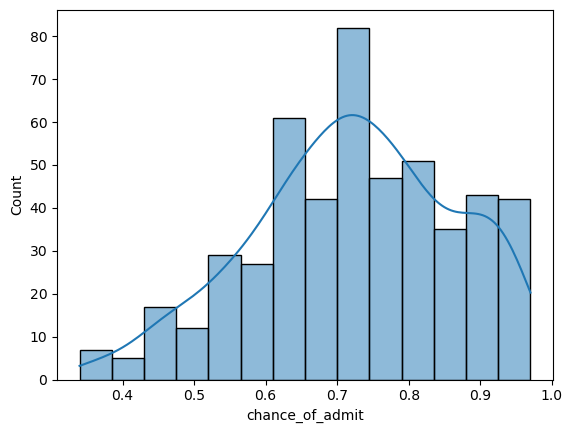

In [13]:
for i in column1:
    sns.histplot(x=data[i],kde=True)
    plt.show()

#### Box plot

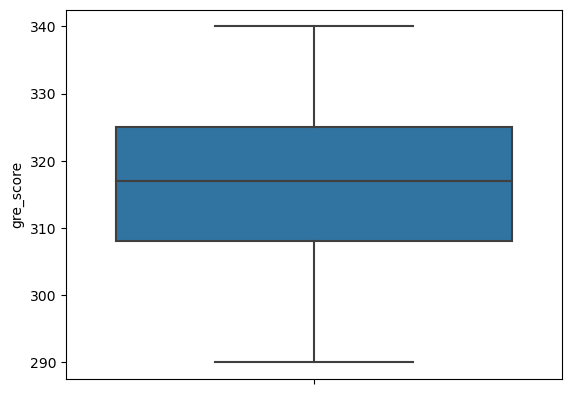

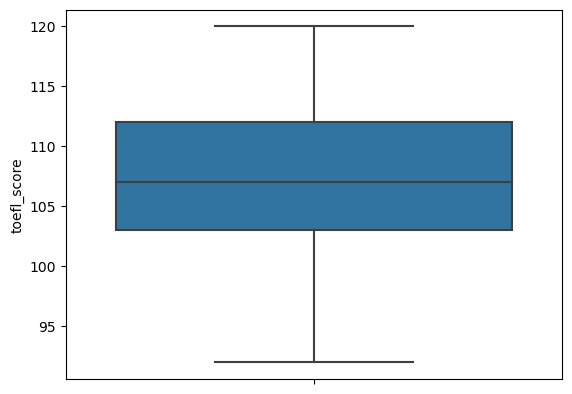

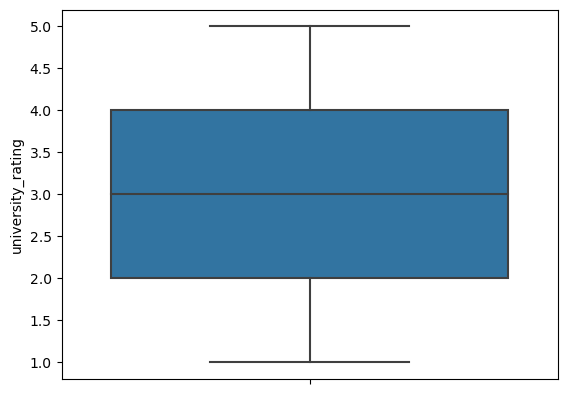

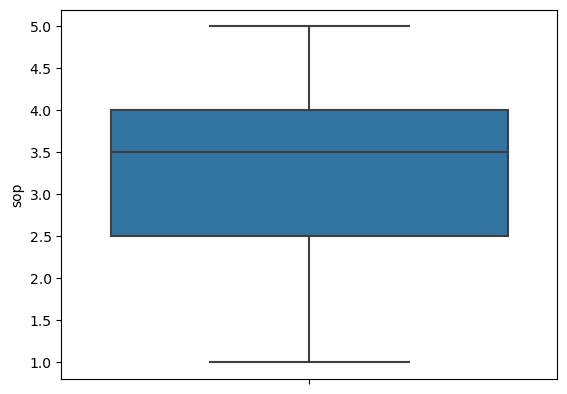

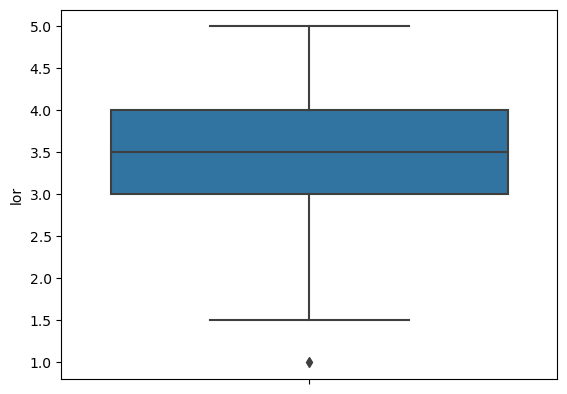

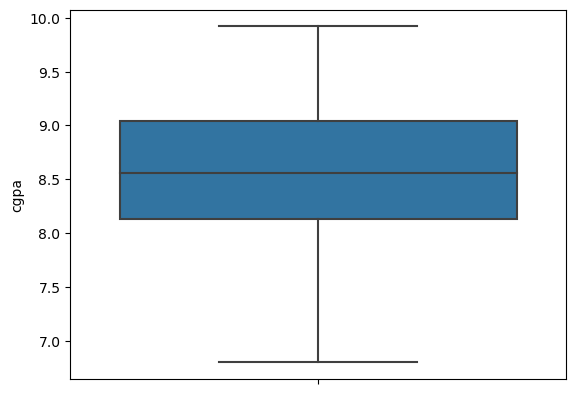

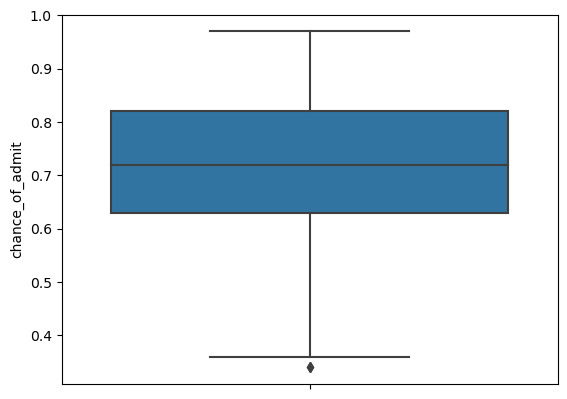

In [14]:
for i in column1:
    sns.boxplot(y=data[i])
    plt.show()

#### There are two outliers (lor,chance of admit)

In [15]:
def outlier_limt(colm):
    Q3,Q1 = np.nanpercentile(colm,[75,25])
    IQR = Q3-Q1
    UL= Q3+1.5*IQR
    LL= Q1-1.5*IQR
    return UL,LL

In [16]:
UL,LL = outlier_limt(data['chance_of_admit'])
data['chance_of_admit']=np.where((data['chance_of_admit']>UL) | (data['chance_of_admit']<LL),np.nan,data['chance_of_admit'])

#### Checking the nan values

In [17]:
data.isnull().sum()

gre_score            0
toefl_score          0
university_rating    0
sop                  0
lor                  0
cgpa                 0
research             0
chance_of_admit      2
dtype: int64

In [18]:
data.dropna(inplace=True)

In [19]:
data.isnull().sum()

gre_score            0
toefl_score          0
university_rating    0
sop                  0
lor                  0
cgpa                 0
research             0
chance_of_admit      0
dtype: int64

### Multivariate analysis
#### Scatter plot

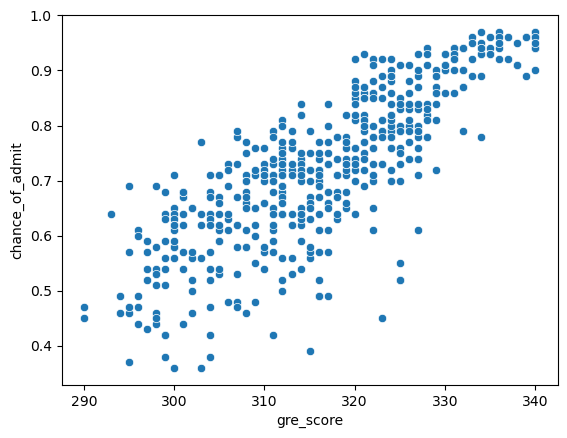

In [20]:
sns.scatterplot(data=data,x='gre_score',y='chance_of_admit')
plt.show()

#### Heat map

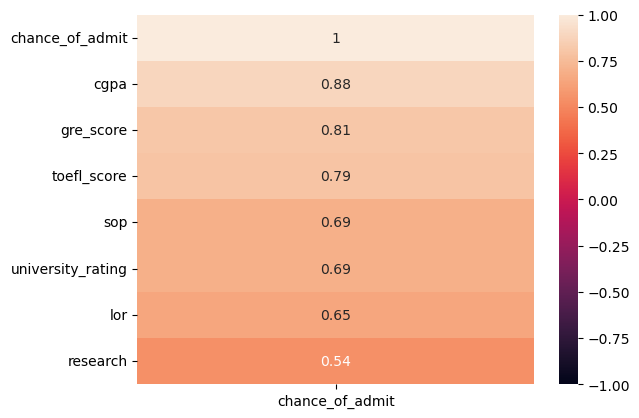

In [21]:
sns.heatmap(data.corr()[['chance_of_admit']].sort_values(by='chance_of_admit',ascending=False),vmin=-1,vmax=1,annot=True)
plt.show()

#### Selecting features and Targets

In [22]:
data.columns

Index(['gre_score', 'toefl_score', 'university_rating', 'sop', 'lor', 'cgpa',
       'research', 'chance_of_admit'],
      dtype='object')

In [23]:
data=data[['cgpa','gre_score','toefl_score','chance_of_admit']]
data.head(5)

,cgpa,gre_score,toefl_score,chance_of_admit
0,9.65,337,118,0.92
1,8.87,324,107,0.76
2,8.00,316,104,0.72
3,8.67,322,110,0.80
4,8.21,314,103,0.65


In [24]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

#### Feature scaling
##### Initialising Standard Scaler

In [25]:
sc = StandardScaler()

In [26]:
x= sc.fit_transform(x)

#### Splitting the data into training and testing sets

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

### Model building
#### Creating dictionary of models for iterative purpose

In [28]:
models = {'LinearRegression':LinearRegression(),
         'Ridge':Ridge(),
         'Lasso':Lasso(),
         'LinearSVR':LinearSVR(),
         'DecisionTreeRegressor':DecisionTreeRegressor(),
         'GradientBoostingRegressor':GradientBoostingRegressor(),
         'AdaBoostRegressor':AdaBoostRegressor(),
         'RandomForestRegressor':RandomForestRegressor(random_state=0)}

#### Using a for loop for model training and testing

In [29]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print('model trained with {}'.format(name))
    training_score = model.score(x_train,y_train)*100
    testing_score = model.score(x_test,y_test)*100
    score = r2_score(y_test,model.predict(x_test))*100
    mae = mean_absolute_error(y_test,model.predict(x_test))
    mse = mean_squared_error(y_test,model.predict(x_test))
    rmse = np.sqrt(mse)
    print('r2score:',score)
    print('training_score:',training_score)
    print('testing_score:',testing_score)
    print('mae:',mae)
    print('mse:',mse)
    print('rmse_test:',rmse)
    print("*"*100)

model trained with LinearRegression
r2score: 77.67301042373941
training_score: 81.11658271070422
testing_score: 77.67301042373941
mae: 0.04477484901610389
mse: 0.003951919576278318
rmse_test: 0.06286429492389395
****************************************************************************************************
model trained with Ridge
r2score: 77.65919347077063
training_score: 81.11608808000821
testing_score: 77.65919347077063
mae: 0.04478664224597004
mse: 0.003954365203206004
rmse_test: 0.0628837435527339
****************************************************************************************************
model trained with Lasso
r2score: -4.427582318698753
training_score: 0.0
testing_score: -4.427582318698753
mae: 0.1056788944723618
mse: 0.018483880482816083
rmse_test: 0.13595543565012796
****************************************************************************************************
model trained with LinearSVR
r2score: 76.99227787833645
training_score: 80.33378205823858
testing